In [3]:
# Importing necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
sns.set()


# Load the data

In [5]:
df=pd.read_csv("data.csv")
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [6]:
df.shape

(52583, 9)

In [7]:
df.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')

# Data pre-processing

In [8]:
# duplicates - handling part

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
52578    False
52579    False
52580    False
52581    False
52582    False
Length: 52583, dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
# null values checking

df.isnull().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [11]:
df.isnull().sum().sum()

757

In [12]:
df.isnull().sum()/len(df)*100 # percentage of null values

S no                            0.000000
Temperature                     0.608562
Humidity                        0.047544
Wind Speed                      0.135025
general diffuse flows           0.585741
diffuse flows                   0.028526
Air Quality Index (PM)          0.034232
Cloudiness                      0.000000
 Power Consumption in A Zone    0.000000
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [14]:

# handling  wrong dtypes
# temperature,humidity,wind speed

df.dtypes

S no                              int64
Temperature                      object
Humidity                         object
Wind Speed                       object
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                        int64
 Power Consumption in A Zone    float64
dtype: object

In [15]:
df['Temperature']=pd.to_numeric(df['Temperature'],errors='coerce')
df['Humidity']=pd.to_numeric(df['Humidity'],errors='coerce')
df['Wind Speed']=pd.to_numeric(df['Wind Speed'],errors='coerce')

In [16]:
df.isnull().sum()

S no                              0
Temperature                     323
Humidity                         26
Wind Speed                       75
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [17]:
df.dtypes

S no                              int64
Temperature                     float64
Humidity                        float64
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                        int64
 Power Consumption in A Zone    float64
dtype: object

In [18]:
# filling missing values
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical type Columns :")
print(numerical_columns)


Numerical type Columns :
Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')


In [19]:
from sklearn.impute import SimpleImputer
imputer_model = SimpleImputer(missing_values=np.nan, strategy='median')
df_imputer = pd.DataFrame(imputer_model.fit_transform(df[numerical_columns]))
df_imputer.columns = df[numerical_columns].columns

In [20]:
df_imputer

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1.0,6.559,73.80,0.083,0.051,0.119,158.0,1.0,34055.69620
1,2.0,6.414,74.50,0.083,0.070,0.085,159.0,1.0,29814.68354
2,3.0,6.313,74.50,0.080,0.062,0.100,151.0,1.0,29128.10127
3,4.0,6.121,75.00,0.083,0.091,0.096,151.0,1.0,28228.86076
4,5.0,5.921,75.70,0.081,0.048,0.085,154.0,1.0,27335.69620
...,...,...,...,...,...,...,...,...,...
52578,52579.0,18.820,75.60,0.094,436.200,38.960,157.0,0.0,34444.55696
52579,52580.0,18.820,73.50,0.089,451.600,37.730,157.0,0.0,34438.48101
52580,52581.0,18.820,70.10,0.085,466.400,37.490,157.0,0.0,33873.41772
52581,52582.0,18.820,67.75,0.086,477.000,37.370,152.0,0.0,33988.86076


In [21]:
df_imputer.isnull().sum()

S no                            0
Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

In [22]:
df_imputer.dtypes

S no                            float64
Temperature                     float64
Humidity                        float64
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                      float64
 Power Consumption in A Zone    float64
dtype: object

In [23]:
df_imputer['Cloudiness']=df_imputer['Cloudiness'].astype('int64')

In [24]:
df_imputer.dtypes

S no                            float64
Temperature                     float64
Humidity                        float64
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                        int64
 Power Consumption in A Zone    float64
dtype: object

In [25]:
df_imputer=df_imputer.iloc[:,1:]
df_imputer

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.80,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.50,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.50,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75.00,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.70,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...
52578,18.820,75.60,0.094,436.200,38.960,157.0,0,34444.55696
52579,18.820,73.50,0.089,451.600,37.730,157.0,0,34438.48101
52580,18.820,70.10,0.085,466.400,37.490,157.0,0,33873.41772
52581,18.820,67.75,0.086,477.000,37.370,152.0,0,33988.86076


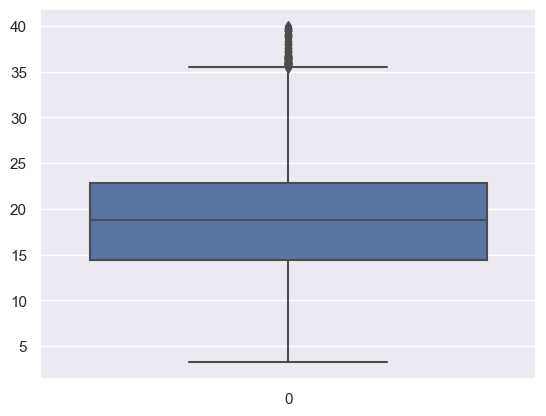

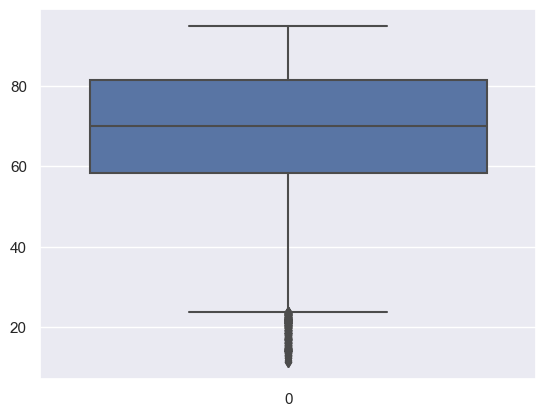

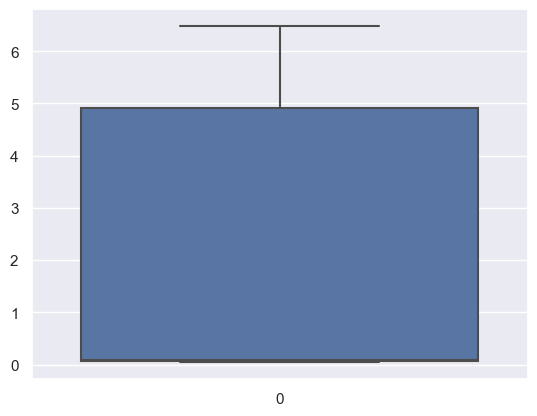

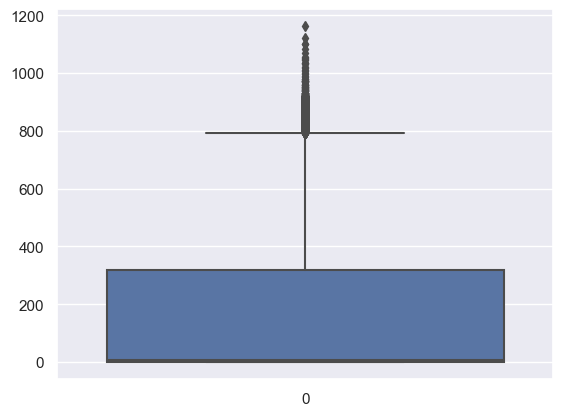

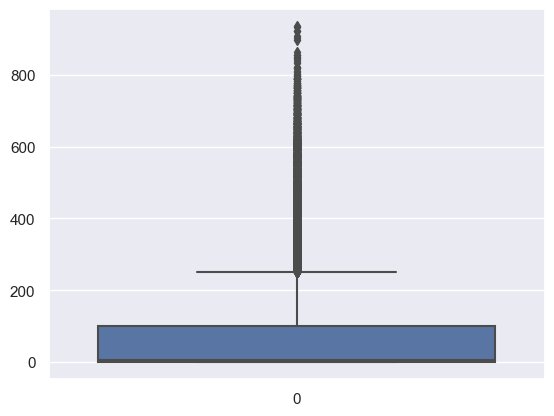

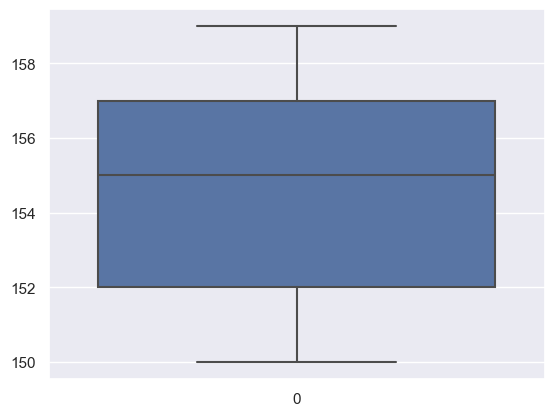

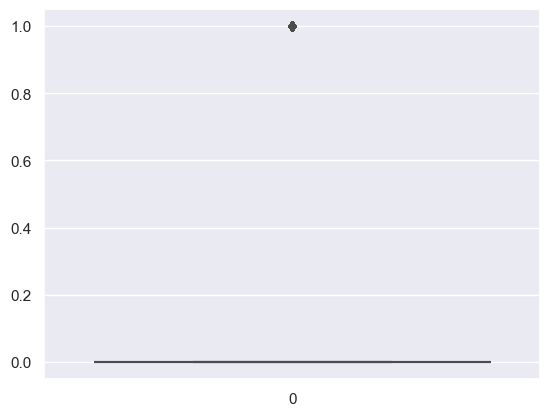

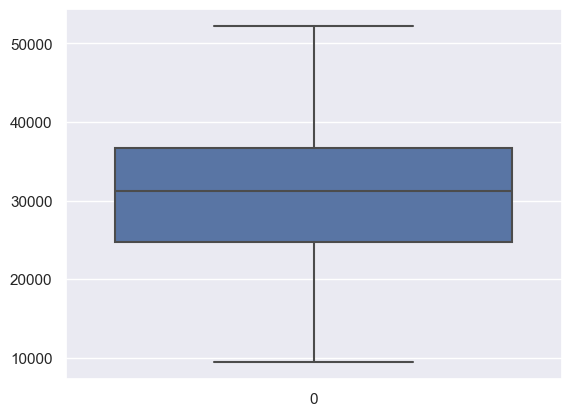

In [26]:
# Checking outlier

def boxplots(col):
    sns.boxplot(df_imputer[col])
    plt.show()

for i in list(df_imputer.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

# EDA

In [27]:
import dtale
dtale.show(df_imputer)

In [28]:
df_imputer.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000
mean,18.827815,68.286244,1.952796,181.923162,74.852230,154.499363,0.009338,31061.821779
std,5.795171,15.541347,2.347332,264.143797,124.072864,2.871077,0.096180,8021.057455
min,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,14.450000,58.340000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,18.820000,69.880000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,22.870000,81.400000,4.915000,317.000000,100.450000,157.000000,0.000000,36721.582445
max,40.010000,94.800000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [29]:
skewness=df_imputer.skew()
print(skewness)

Temperature                      0.194462
Humidity                        -0.627568
Wind Speed                       0.468408
general diffuse flows            1.313883
diffuse flows                    2.461325
Air Quality Index (PM)          -0.001800
Cloudiness                      10.203384
 Power Consumption in A Zone     0.031528
dtype: float64


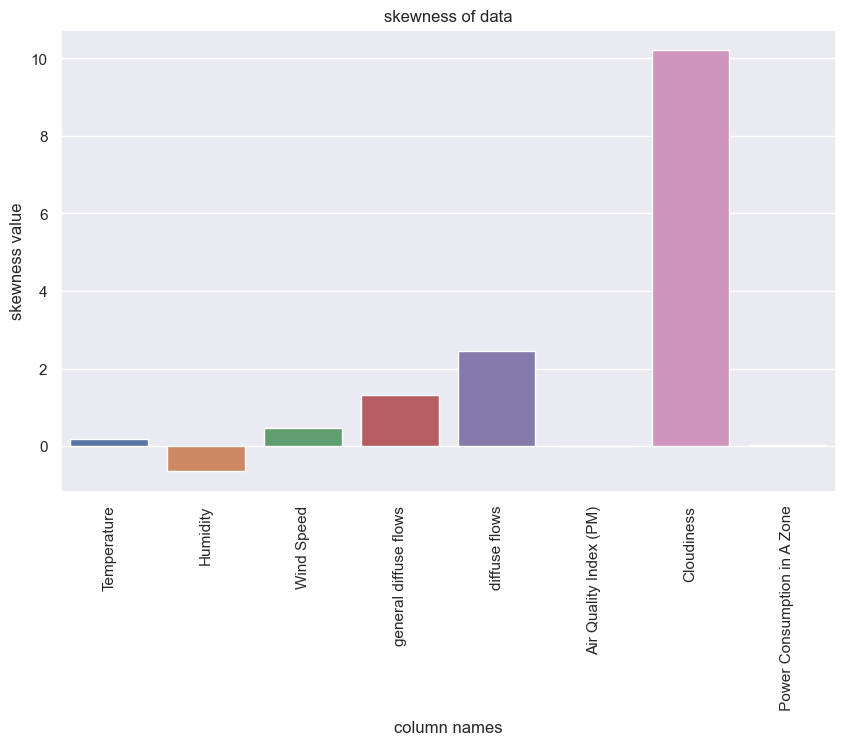

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=skewness.index,y=skewness.values)
plt.title('skewness of data')
plt.xlabel('column names')
plt.ylabel('skewness value')
plt.xticks(rotation=90)
plt.show()

In [31]:
df_imputer['Cloudiness'].value_counts()

Cloudiness
0    52092
1      491
Name: count, dtype: int64

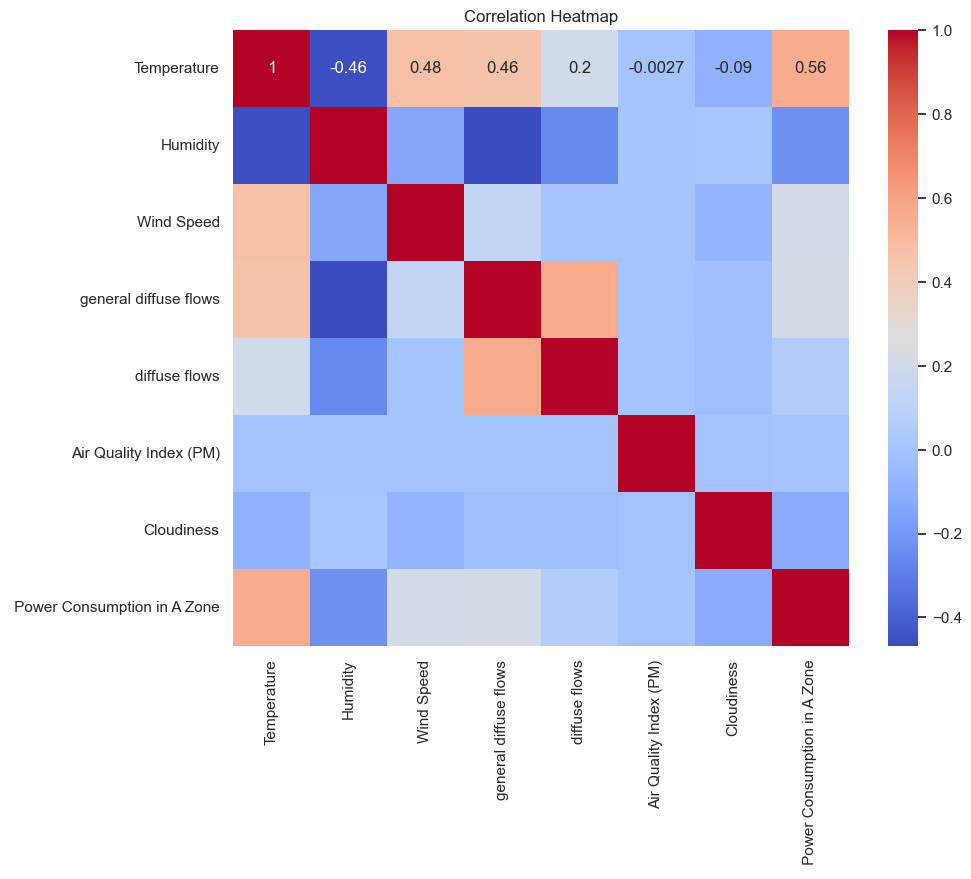

In [32]:
# Calculate correlation matrix
corr_matrix = df_imputer.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title
plt.title("Correlation Heatmap")
plt.show()


In [33]:
cols_to_transform = ['general diffuse flows', 'diffuse flows']  
df_imputer[cols_to_transform] = df_imputer[cols_to_transform].apply(np.log)

In [34]:
skewness=df_imputer.skew()
print(skewness)

Temperature                      0.194462
Humidity                        -0.627568
Wind Speed                       0.468408
general diffuse flows            0.048697
diffuse flows                    0.072781
Air Quality Index (PM)          -0.001800
Cloudiness                      10.203384
 Power Consumption in A Zone     0.031528
dtype: float64


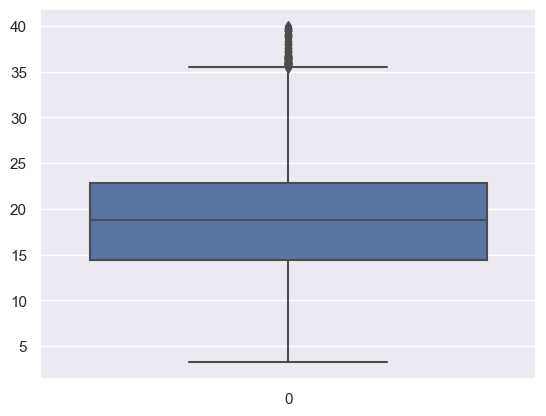

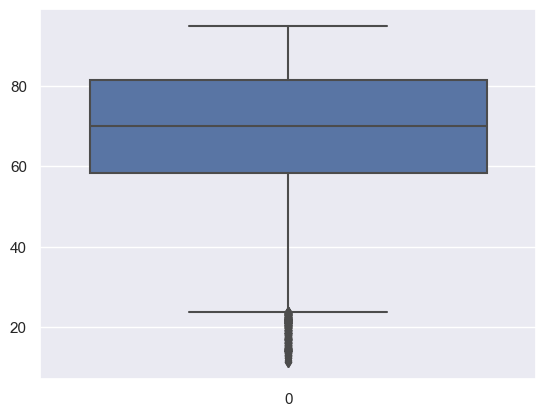

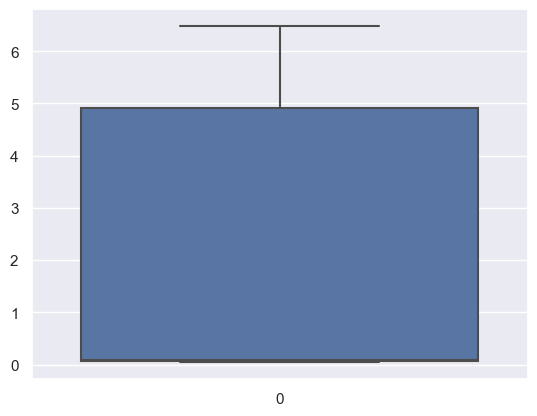

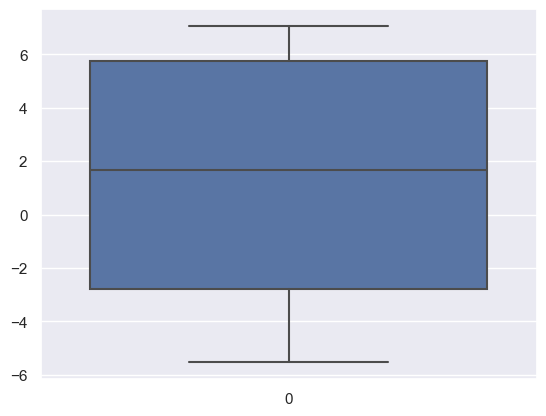

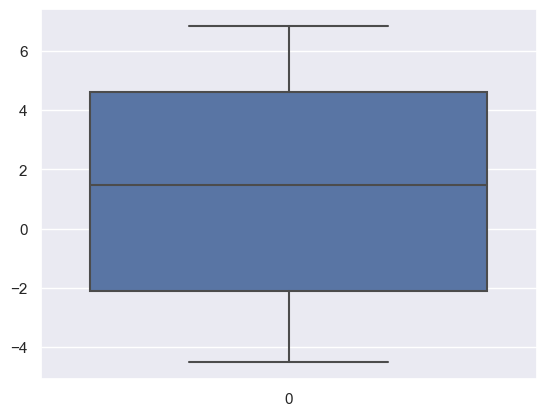

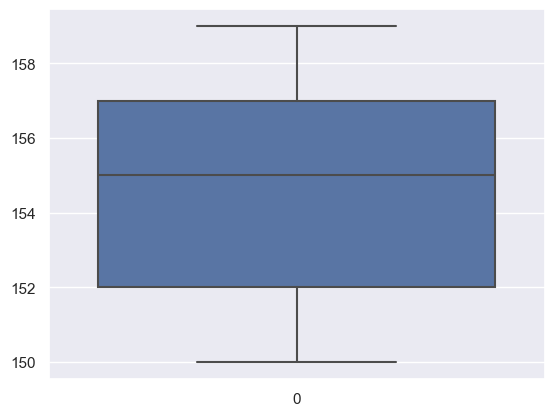

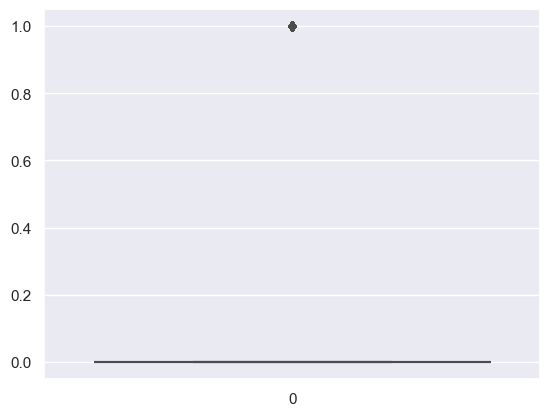

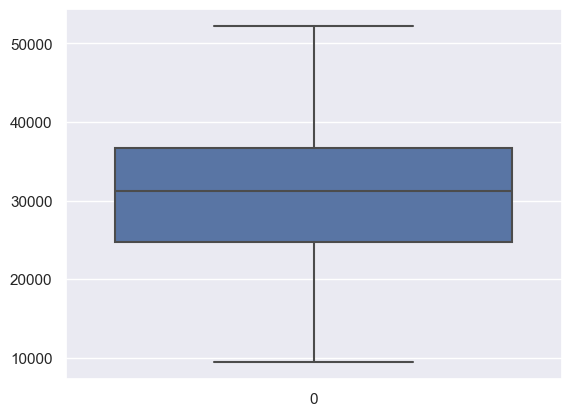

In [35]:
def boxplots(col):
    sns.boxplot(df_imputer[col])
    plt.show()

for i in list(df_imputer.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [432]:
df_imputer=df_imputer.drop('Cloudiness',axis=1)

In [36]:
# feature scaling
from sklearn .preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_imputer)
df_scaled = pd.DataFrame(df_scaled, columns=df_imputer.columns)

In [37]:
df_scaled

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,-2.117096,0.354783,-0.796569,-1.058616,-1.008494,1.219288,10.300179,0.373255
1,-2.142117,0.399825,-0.796569,-0.982245,-1.107615,1.567593,10.300179,-0.155484
2,-2.159545,0.399825,-0.797848,-1.011514,-1.059739,-1.218845,10.300179,-0.241083
3,-2.192676,0.431997,-0.796569,-0.918972,-1.071764,-1.218845,10.300179,-0.353194
4,-2.227188,0.477039,-0.797422,-1.073236,-1.107615,-0.173930,10.300179,-0.464547
...,...,...,...,...,...,...,...,...
52578,-0.001348,0.470604,-0.791883,1.124918,0.697508,0.870984,-0.097086,0.421736
52579,-0.001348,0.335480,-0.794013,1.133285,0.688058,0.870984,-0.097086,0.420978
52580,-0.001348,0.116706,-0.795717,1.141062,0.686178,0.870984,-0.097086,0.350530
52581,-0.001348,-0.034505,-0.795291,1.146482,0.685233,-0.870540,-0.097086,0.364923


# split data into train and test

In [38]:
print(df_scaled.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness',
       ' Power Consumption in A Zone'],
      dtype='object')


In [39]:
df_scaled=df_scaled.rename(columns={' Power Consumption in A Zone':'Power Consumption in A Zone'})

In [40]:
print(df_scaled.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness',
       'Power Consumption in A Zone'],
      dtype='object')


In [41]:
# split the data into independent and dependent variables
x = df_scaled.drop('Power Consumption in A Zone', axis=1)
y = df_scaled['Power Consumption in A Zone']

In [42]:
x.isnull().sum()

Temperature               0
Humidity                  0
Wind Speed                0
general diffuse flows     0
diffuse flows             0
Air Quality Index (PM)    0
Cloudiness                0
dtype: int64

In [43]:
x.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness'],
      dtype='object')

In [44]:
y.count()

52583

In [45]:
y.value_counts()

Power Consumption in A Zone
 0.436128    27
-1.000105    20
-0.281988    18
-0.641046    15
-0.921259    13
             ..
-0.225525     1
-0.155542     1
 0.011461     1
 0.292982     1
 0.386133     1
Name: count, Length: 27760, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
pd.DataFrame(y_train).value_counts()

Power Consumption in A Zone
 0.436128                      21
-0.281988                      16
-1.000105                      15
-0.641046                      12
-1.135902                      11
                               ..
-0.219843                       1
-0.219794                       1
-0.219375                       1
-0.219232                       1
 2.635909                       1
Name: count, Length: 24496, dtype: int64

In [48]:
pd.DataFrame(y_test).value_counts()

Power Consumption in A Zone
 0.436128                      6
-0.921259                      5
 0.578801                      5
-1.000105                      5
-1.311962                      4
                              ..
-0.433460                      1
-0.433682                      1
-0.434440                      1
-0.434665                      1
 2.557003                      1
Name: count, Length: 8999, dtype: int64

In [340]:
# scaling x_train and x_test data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Building machine Learning Algorithm

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [51]:
# Linear regression
lin_model=LinearRegression()
lin_model= lin_model.fit(x_train, y_train)
y_pred_lin = lin_model.predict(x_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin=np.sqrt(mse_lin)

# DecisionTree
dtree = DecisionTreeRegressor()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt=np.sqrt(mse_dt)

In [52]:
# RandomForest
rforest = RandomForestRegressor()
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf=np.sqrt(mse_rf)

# XGBoost
xgboost = XGBRegressor()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg=np.sqrt(mse_xg)


In [53]:
# KNN
knn = KNeighborsRegressor()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn=np.sqrt(mse_knn)

# SVM
svm = SVR()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm=np.sqrt(mse_svm)


In [54]:
# Voting Classifier - combining all the above model together by using voting Regressor approach
model_evc = VotingRegressor(estimators = [('lin_model',lin_model), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
mse_evc = mean_squared_error(y_test, pred_evc)
rmse_evc=np.sqrt(mse_evc)

       Method Used      RMSE
0  LinearRegession  0.821031
1            Dtree  0.861369
2          RForest  0.603625
3              XGB  0.666683
4              KNN  0.776557
5              SVM  0.788482
6           Voting  0.663526
Axes(0.125,0.11;0.775x0.77)


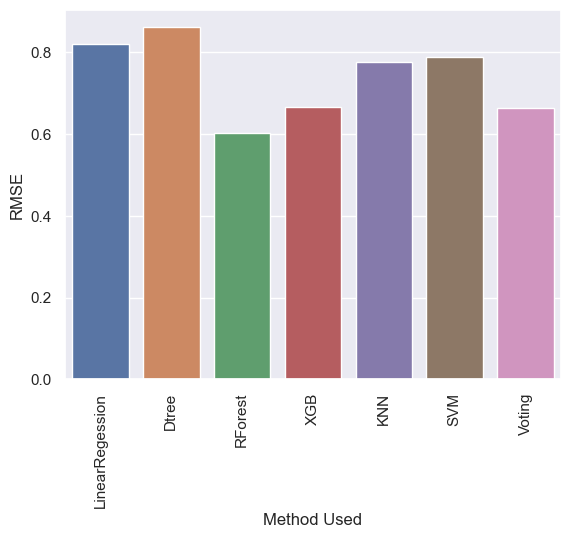

In [57]:
list1 = ['LinearRegession','Dtree','RForest','XGB','KNN','SVM','Voting']
list2 = [rmse_lin,rmse_dt,rmse_rf,rmse_xg,rmse_knn,rmse_svm,rmse_evc]
list3 = [lin_model,dtree,rforest,xgboost,knn,svm,model_evc]

df_root_mean_squared_error = pd.DataFrame({"Method Used":list1, "RMSE":list2})

print(df_root_mean_squared_error)

chart = sns.barplot(x="Method Used", y="RMSE", data=df_root_mean_squared_error)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)   


# Cross validation of model

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

# Define the RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Train a Decision Tree Regressor model
dtree = DecisionTreeRegressor()

# Define the cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(dtree, x_train, y_train, cv=kfold, scoring=rmse_scorer)

print("Cross-validation RMSE scores:", np.sqrt(-scores))

print("Average cross-validation RMSE:", np.sqrt(-scores.mean()))


Cross-validation RMSE scores: [0.86186496 0.89214839 0.87443749 0.87739853 0.86794537]
Average cross-validation RMSE: 0.8748186356522306
